In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import timeit
import math
import random
from mpmath import *
from datetime import datetime, timedelta
from scipy.optimize import curve_fit
#import xarray

In [4]:
wfriend = pd.read_csv("../Data_Sets/weeplaces/weeplaces/weeplace_friends.csv")
wfriend = wfriend.sort_values(by = ['userid1'])

In [5]:
wf = pd.read_csv("../Data_Sets/weeplaces/weeplaces/weeplace_checkins_scrubbed_Reordered_DistinctLocs_QPiRog2.csv")
wf = wf.drop(columns=['Counts','Hours','cum_tot','S','S_id','q','Unnamed: 0'])

In [6]:
#usrs[0] = All users with more than 5 friends
usrs = [wfriend.groupby('userid1').count()[wfriend.groupby('userid1').count()['userid2'] >= 5].index.to_list()]
usrswf = [wf.groupby('userid').count().index.to_list()]
wfriend2 = wfriend[wfriend['userid1'].isin(usrs[0])]


In [8]:
#usrs[1] = All users with between 5 and 130 friends
usrs.append(wfriend.groupby('userid1').count()[(wfriend.groupby('userid1').count()['userid2'] < 130) & (wfriend.groupby('userid1').count()['userid2'] >= 5)].index.to_list())
wfriend3 = wfriend[wfriend['userid1'].isin(usrs[1])]
#usrs[2] = All users with between 5 and 130 friends and all users in userid1 that are also present in userid2
usrs.append(wfriend[(wfriend['userid1'].isin(usrs[1])) & wfriend['userid2'].isin(usrs[1])].groupby('userid1').count().index.to_list())
wfriend4 = wfriend[(wfriend['userid1'].isin(usrs[2]))]
#usrs[3] = All Users from usrs[2] that also have more than 15 friends
usrs.append(wfriend4.groupby('userid1').count()[(wfriend4.groupby('userid1').count()['userid2'] < 130) & (wfriend4.groupby('userid1').count()['userid2'] >= 15)].index.to_list())
wfriend5 = wfriend4[(wfriend4['userid1'].isin(usrs[3]))]
#wf2 is the location network with all users from usrs[3]
wf2 = wf[wf['userid'].isin(usrs[3])]

In [1]:
'''Finds top friends of a particular ego based on number of mutual friends'''
def topFriendsMutuals(ego):
    TopFriendsEgo = []
    friendsEgo = wfriend5[wfriend5['userid1']== ego]['userid2'].to_list()
    for friend in friendsEgo:
        mutuals = wfriend5[(wfriend5['userid1']== friend) & (wfriend5['userid1'].isin(friendsEgo))].shape[0]-1
        if mutuals < 0:
            mutuals = 0
        TopFriendsEgo.append(mutuals)
    numMutualFriends = [x for _,x in sorted(zip(TopFriendsEgo,friendsEgo))][::-1]
    TopFriendsEgo = sorted(TopFriendsEgo)[::-1]
    return [numMutualFriends,TopFriendsEgo]

In [14]:
'''Contains paramters used to determine proximity'''
LocNetwork = []
'''LocNwtwork = [[users],[RCM_x],[RCM_y],[RoG]]'''
LocNetwork.append(wf2.groupby('userid').head(1)['userid'].to_list())
LocNetwork.append(wf2.groupby('userid').head(1)['rcm(final)_x'].round(4).to_list())
LocNetwork.append(wf2.groupby('userid').head(1)['rcm(final)_y'].round(4).to_list())
LocNetwork.append(wf2.groupby('userid').head(1)['Radius of Gyration'].to_list())

In [77]:
'''Analysis was done earlier comparing the proportion of top friends present in both the Friendship Network
analysis and the Co-location analysis. It turns out there is not much crossover, with most having no intersection
between the two'''
#Proportion of Mutual Friends in the Location Network that are also based in proximity
PropMutualFriends = []
for i in range(len(LocNetwork[0])):
    dummy = [x for x in TopFriendsAll[i] if x in TopFriendsLocsAll[i]]
    if len(TopFriendsAll[i]) == 0:
        PropMutualFriends.append(0)
    else:
        PropMutualFriends.append(len(dummy)/len(TopFriendsAll[i]))
PropMutualFriends

[0.0,
 0.03125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.027777777777777776,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05555555555555555,
 0.0,
 0.0,
 0.0,
 0.0,
 0.022727272727272728,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.018518518518518517,
 0.0,
 0.0,
 0.0,
 0.058823529411764705,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.025,
 0.0,
 0.013333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.022222222222222223,
 0.0,
 0.0,
 0.027777777777777776,
 0.0,
 0.0,
 0.0,
 0.0

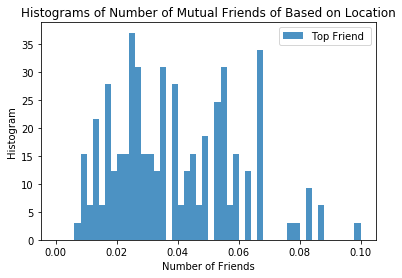

In [82]:
plt.title('Histograms of Proportion of Shared Mutuals between Friendship Network Top Friends and Location based Top Friends')
plt.xlabel('Proportion of Friends Shared between Networks')
plt.ylabel('Histogram')
plt.hist(PropMutualFriends,bins = 50,density = True, label = 'Top Friend ',alpha=.8, range=(0.0001,.1))

plt.legend()
plt.show()


In [19]:
numFriendsPDF = np.histogram(numFriendsLocFriendNetwork,bins=400)
numFriendsCDF = np.cumsum(numFriendsPDF[0])/np.sum(numFriendsPDF[0])
numFriendsPDF[1]

array([  0.   ,   0.655,   1.31 ,   1.965,   2.62 ,   3.275,   3.93 ,
         4.585,   5.24 ,   5.895,   6.55 ,   7.205,   7.86 ,   8.515,
         9.17 ,   9.825,  10.48 ,  11.135,  11.79 ,  12.445,  13.1  ,
        13.755,  14.41 ,  15.065,  15.72 ,  16.375,  17.03 ,  17.685,
        18.34 ,  18.995,  19.65 ,  20.305,  20.96 ,  21.615,  22.27 ,
        22.925,  23.58 ,  24.235,  24.89 ,  25.545,  26.2  ,  26.855,
        27.51 ,  28.165,  28.82 ,  29.475,  30.13 ,  30.785,  31.44 ,
        32.095,  32.75 ,  33.405,  34.06 ,  34.715,  35.37 ,  36.025,
        36.68 ,  37.335,  37.99 ,  38.645,  39.3  ,  39.955,  40.61 ,
        41.265,  41.92 ,  42.575,  43.23 ,  43.885,  44.54 ,  45.195,
        45.85 ,  46.505,  47.16 ,  47.815,  48.47 ,  49.125,  49.78 ,
        50.435,  51.09 ,  51.745,  52.4  ,  53.055,  53.71 ,  54.365,
        55.02 ,  55.675,  56.33 ,  56.985,  57.64 ,  58.295,  58.95 ,
        59.605,  60.26 ,  60.915,  61.57 ,  62.225,  62.88 ,  63.535,
        64.19 ,  64.

In [20]:
numFriendsCDF

array([0.11272958, 0.18366054, 0.18366054, 0.23685877, 0.28815706,
       0.28815706, 0.33058898, 0.36668778, 0.36668778, 0.39075364,
       0.41545282, 0.41545282, 0.44141862, 0.45915136, 0.45915136,
       0.47878404, 0.49398353, 0.49398353, 0.50918303, 0.52058265,
       0.52058265, 0.53198227, 0.54148195, 0.54148195, 0.54718176,
       0.55731476, 0.55731476, 0.56871438, 0.56871438, 0.57884737,
       0.58454718, 0.58454718, 0.59024699, 0.59658011, 0.59658011,
       0.60354655, 0.60987967, 0.60987967, 0.61494617, 0.61747942,
       0.61747942, 0.62507916, 0.6269791 , 0.6269791 , 0.63141229,
       0.63584547, 0.63584547, 0.64281191, 0.64851172, 0.64851172,
       0.65547815, 0.66054465, 0.66054465, 0.66687777, 0.67257758,
       0.67257758, 0.67574414, 0.67574414, 0.67954402, 0.6839772 ,
       0.6839772 , 0.68587714, 0.68777707, 0.68777707, 0.69221026,
       0.69727676, 0.69727676, 0.69854338, 0.70424319, 0.70424319,
       0.7048765 , 0.70867638, 0.70867638, 0.71184294, 0.71817

No handles with labels found to put in legend.


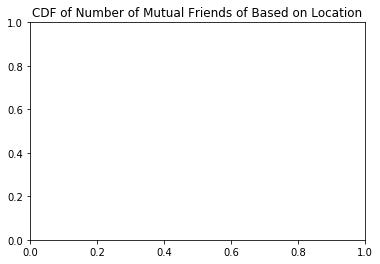

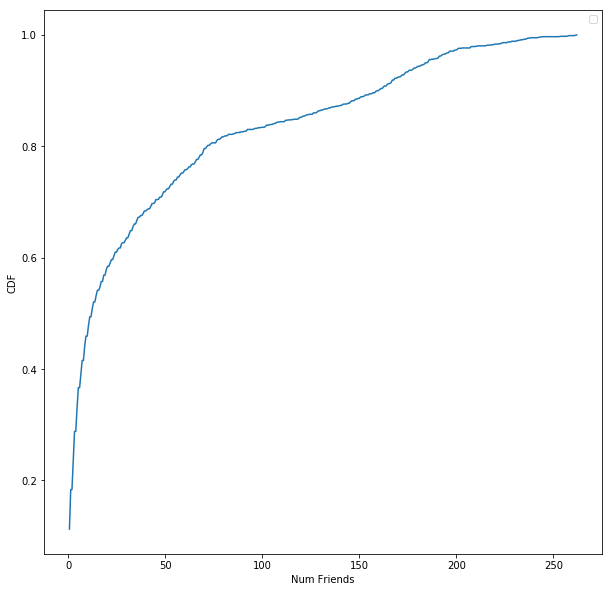

In [50]:
'''CDF of Number of Mutual Friends of Based on Location'''
plt.title('CDF of Number of Mutual Friends of Based on Location')
fig=plt.figure(figsize=(10, 10))
plt.plot(numFriendsPDF[1][1:],numFriendsCDF, '-')
plt.ylabel('CDF')
plt.xlabel('Num Friends')
plt.legend()
plt.show()

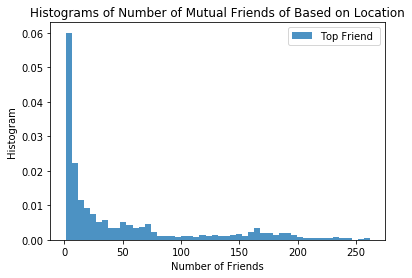

In [27]:
plt.title('Histograms of Number of Mutual Friends of Based on Location')
plt.xlabel('Number of Friends')
plt.ylabel('Histogram')
plt.hist(numFriendsLocFriendNetwork,bins = 50,density = True, label = 'Top Friend ',alpha=.8, range=(1,np.max(numFriendsLocFriendNetwork)))

plt.legend()
plt.show()


In [53]:
'''Finds Top Friends based on Number of Mutual Friends
TopFriendsAll are the Top Friends in order for every ego
numMutFriends is a 2D array of the number of mutual friends for each alter
'''

TopFriendsAll = []
numMutFriends = []
start = timeit.default_timer()
i = 0
#for usr in usrs[1]:
for usr in LocNetwork[0]:
    print(i)
    #start2 = timeit.default_timer()
    dummy = topFriendsMutuals(usr)
    TopFriendsAll.append(dummy[0])
    numMutFriends.append(dummy[1])
    #stop2 = timeit.default_timer()
    #print("Time: ", stop2-start2) 
    i+=1
stop = timeit.default_timer()
print("Time: ", stop-start) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [54]:
'''Gets the length of each list (number of friends) to find the max of the list'''
lens = []
for lst in numMutFriends:
    lens.append(len(lst))
maxlen = max(lens)

In [55]:
'''Makes a 2d array where each element i contains the number of mutual friends of the ith 
closest friends for every ego'''
numMutFriendRank = []
for ego in numMutFriends:
    #print(ego)
    for i in range(maxlen):
        if numMutFriendRank == list():
            numMutFriendRank.append([])
        if i > len(numMutFriendRank)-1:
            numMutFriendRank.append([])
        if len(ego) > i:
            numMutFriendRank[i].append(ego[i])
        else:
            break
        #print(numMutFriendRank)
#for lst in numMutFriendRank:
    

In [56]:
'''Gets the mean number of friends of each top friend'''
meanMutFriendRank = []
for rank in numMutFriendRank:
    meanMutFriendRank.append(np.mean(rank))
meanMutFriendRank
                        

[84.07536415452819,
 65.5161494616846,
 54.03103229892337,
 45.725775807473084,
 39.78150728309056,
 34.75237492083597,
 30.956301456618114,
 27.820139328689045,
 25.107663077897403,
 22.697910069664346,
 20.604813172894236,
 18.6478784040532,
 16.75744141861938,
 15.019632678910703,
 13.388853704876505,
 13.063888888888888,
 12.668171557562077,
 12.610972568578553,
 12.504094631483166,
 12.50909090909091,
 12.357456140350877,
 12.149643705463182,
 12.133247089262614,
 11.724137931034482,
 11.542222222222222,
 11.4176,
 11.331022530329289,
 10.91970802919708,
 10.98015873015873,
 10.997849462365592,
 10.872979214780601,
 10.42512077294686,
 10.341025641025642,
 10.054054054054054,
 9.663865546218487,
 9.583832335329342,
 9.53525641025641,
 9.315436241610739,
 9.222222222222221,
 9.213740458015268,
 9.179591836734694,
 8.897872340425533,
 8.728506787330316,
 8.569377990430622,
 8.577319587628866,
 8.530386740331492,
 8.224137931034482,
 8.041420118343195,
 7.919753086419753,
 7.85064935

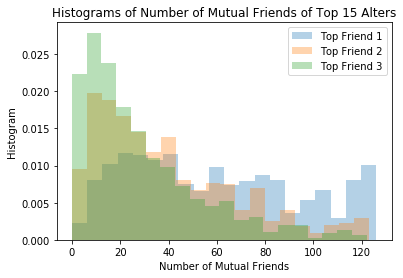

In [33]:
plt.title('Histograms of Number of Mutual Friends of Top ' + str(n) + ' Alters')
plt.xlabel('Number of Mutual Friends')
plt.ylabel('Histogram')
n = 3
i = 1
for FriendRank in numMutFriendRank[:n]:
    plt.hist(FriendRank,bins = 20,density = True, label = 'Top Friend ' + str(i),alpha=1/n)
    i+=1
plt.legend()
plt.show()


No handles with labels found to put in legend.


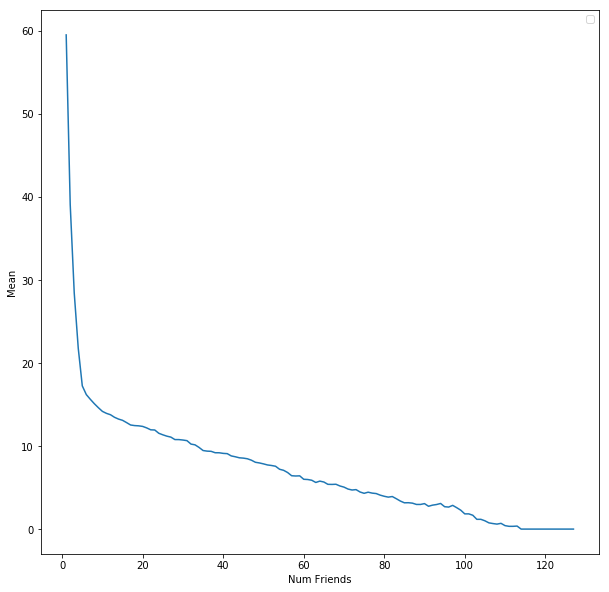

In [164]:
'''Average Number of Friends per Rank based on Number of Mutual Friends'''
fig=plt.figure(figsize=(10, 10))
plt.plot(np.arange(1,len(meanMutFriendRank)+1,1), meanMutFriendRank, '-')
plt.ylabel('Mean')
plt.xlabel('Num Friends')
plt.legend()
plt.show()

In [85]:
'''Entropy estimator for the time dependent string of locations of a given user'''

def Lempel_Ziv(ego):
    Lambda_i = 0
    maxlen = 0
    dict_ego = []
    loc_x = wf[wf['userid'] == ego]['lon'].round(4).to_list()
    loc_y = wf[wf['userid'] == ego]['lat'].round(4).to_list()
    lenx = len(loc_x)
    i = 0
    while i < len(loc_x):
        substr = []
        j = 0
        if dict_ego == []:
            Lambda_i += 1
            dict_ego.append([[(loc_x[i],loc_y[i])]])
            maxlen += 1
            i+=1
        else:
            while i < len(loc_x):
                substr.append((loc_x[i+j],loc_y[i+j]))
                strlen = len(substr)
                if strlen > maxlen:
                    maxlen += 1
                    dict_ego.append([substr])
                    Lambda_i += j+1
                    i+= 1
                    break
                if (i+j) == (len(loc_x) - 1):
                    dict_ego[strlen-1].append(substr)
                    Lambda_i += j+1
                    i += 1
                    break
                if substr in dict_ego[strlen-1]:
                    j += 1
                else:
                    Lambda_i += j+1
                    dict_ego[strlen-1].append(substr)
                    i += 1
                    break
    return [lenx*np.log2(lenx)/Lambda_i,dict_ego,Lambda_i,lenx]

In [86]:
def CrossEntropy(ego,alters, **kwargs):
    '''Dictionaries of Alters and their lengths are stored in an array in the order the alters were called
    kwargs:
        with_ego: bool, True implies we include the ego in the cummulative cross entropy
        temporal_control: bool, True means we shuffle the time stamps of the alter locations
    '''
    
    '''Lambda_i is a list of the cross-parsed match lengths of the ego based on each alter i
    wb is a list of number of matches of substrings of A in B
    cross_ent is the list of (cummulative) cross entropies of the alters'''
    TempCont = False
    if 'temporal_control' in kwargs:
        TempCont = kwargs['temporal_control']
    '''Gets Coordinates of alters. Makes array of x-locs and y-locs
    key is an array the size of the list of locations with all elements 'B', signifying each element as the alter's
    N_alters is a list of the number of coordinates in the alter's string
    Time_alters are the timestamps of the location visits
    '''
    if type(alters) is list:
        loc_x_alters = []
        loc_y_alters = []
        key_alters = []
        time_alters = []
        N_alters = []
        k = 0
        for usr in alters:
            #print(usr)
            loc_x_alters.append(wf[wf['userid'] == usr]['lon'].round(4).to_list())
            loc_y_alters.append(wf[wf['userid'] == usr]['lat'].round(4).to_list())
            key_alters.append(['B']*len(loc_x_alters[k]))
            N_alters.append(len(loc_x_alters[k]))
            time_alters.append(wf[wf['userid'] == usr]['datetime'].to_list())
            if TempCont:
                '''If we want a temporally controlled entropy, we shuffle the times and sort the 
                locations with respect to the shuffled time list'''
                random.shuffle(time_alters[k])
                loc_x_alters[k] = [x for _, x in sorted(zip(time_alters[k],loc_x_alters[k]))]
                loc_y_alters[k] = [x for _, x in sorted(zip(time_alters[k],loc_y_alters[k]))]
            k+=1
    else:
        k=0
        loc_x_alters = [wf[wf['userid'] == alters]['lon'].round(4).to_list()]
        loc_y_alters = [wf[wf['userid'] == alters]['lat'].round(4).to_list()]
        key_alters = [['B']*len(loc_x_alters[k])]
        time_alters = [wf[wf['userid'] == alters]['datetime'].to_list()]
        N_alters = [len(loc_x_alters[0])]
        if TempCont:
            random.shuffle(time_alters)
            loc_x_alters = [x for _, x in sorted(zip(time_alters,loc_x_alters))]
            loc_y_alters = [x for _, x in sorted(zip(time_alters,loc_y_alters))]
        
    Lambda_i = []
    wb = []
    cross_ent = []
    k = -1
    ego_index = 0
    if 'with_ego' in kwargs:
        with_ego = kwargs['with_ego']
        if kwargs['with_ego']:
            dummy = Lempel_Ziv(ego)
            wb.append(dummy[3])
            Lambda_i.append(dummy[2])
            N_alters.insert(0,dummy[3])
            ego_index = 1
    else:
        with_ego = False
    loc_x_ego = wf[wf['userid'] == ego]['lon'].round(4).to_list()
    loc_y_ego = wf[wf['userid'] == ego]['lat'].round(4).to_list()
    key_ego = ['A']*len(loc_x_ego)
    time_ego = wf[wf['userid'] == ego]['datetime'].to_list()
    N_ego = len(loc_x_ego)
    for ALTER in loc_x_alters:
        i = 0
        i_ego = 0
        i_alter = 0
        k+=1
        maxlen = 0
        dict_ego = []
        dict_alter = []
        wb.append(0)
        Lambda_i.append(0)
        #print(k)
        loc_x = loc_x_ego + loc_x_alters[k]
        loc_y = loc_y_ego + loc_y_alters[k]
        key = key_ego + key_alters[k]
        times = time_ego + time_alters[k]
        key = [x for _, x in sorted(zip(times,key))]
        loc_x = [x for _, x in sorted(zip(times,loc_x))]
        loc_y = [x for _, x in sorted(zip(times,loc_y))]
        while i < len(loc_x):
            substr_ego = []
            substr_alter = []
            j_ego = 0
            j_alter = 0
            while True:
                if (key[i] == 'A') & (i_ego + j_ego < len(loc_x_ego)):
                    substr_ego.append((loc_x_ego[i_ego+j_ego],loc_y_ego[i_ego+j_ego]))
                    strlen_ego = len(substr_ego)
                    if strlen_ego > maxlen:
                        maxlen += 1
                        dict_ego.append([substr_ego])
                        dict_alter.append([])
                        Lambda_i[k+ego_index] += j_ego+1
                        i+= 1
                        i_ego+=1
                        break
                    if (i_ego+j_ego) == (len(loc_x_ego) - 1):
                        dict_ego[strlen_ego-1].append(substr_ego)
                        Lambda_i[k+ego_index] += j_ego+1
                        i_ego += 1
                        i+=1
                        break
                    if (substr_ego in dict_alter[strlen_ego-1]):
                        j_ego += 1
                        wb[k+ego_index] += 1   
                    else:
                        Lambda_i[k+ego_index] += j_ego+1
                        dict_ego[strlen_ego-1].append(substr_ego)
                        i += 1
                        i_ego+=1
                        break
                elif (key[i] == 'B') & (i_alter + j_alter < len(loc_x_alters[k])):
                    substr_alter.append((loc_x_alters[k][i_alter+j_alter],loc_y_alters[k][i_alter+j_alter]))
                    strlen_alter = len(substr_alter)
                    if strlen_alter > maxlen:
                        maxlen += 1
                        dict_alter.append([substr_alter])
                        dict_ego.append([])
                        i+= 1
                        i_alter+=1
                        break
                    if (i_alter+j_alter) == (len(loc_x_alters[k]) - 1):
                        dict_alter[strlen_alter-1].append(substr_alter)
                        i_alter += 1
                        i+=1
                        break
                    if (substr_alter in dict_alter[strlen_alter-1]):
                        j_alter += 1 
                    else:
                        dict_alter[strlen_alter-1].append(substr_alter)
                        i += 1
                        i_alter+=1
                        break      
        N_AB = np.sum(np.multiply(wb,N_alters[:len(wb)]))/np.sum(wb)
        Lambda_max = np.max(Lambda_i)
        #print(wb)
        #print(N_alters[:len(wb)])
        #print(N_AB)
        #print(Lambda_i)
        cross_ent.append(N_ego*np.log2(N_AB)/Lambda_max)
    return cross_ent

In [87]:
'''LZ_CrossEntropy gets the Cross Entropy of all Alters. List of lists of the CEs of (at least) the 15 alters of the ego
CCE_All is the list of CCE of alters of each user. Same form as LZ_CrossEntropy except LZ_CrossEntropy[x][0] is the
entropy of the ego'''
LZ_CrossEntropy = []
CCE_All = []
start1 = timeit.default_timer()
#print(len(usrsMut))
i = 0
#i = i_checkpoint
for usr in LocNetwork[0]:
    print(i)
    numFriends = 15
    start = timeit.default_timer()
    if TopFriendsAll[i] == list():
        LZ_CrossEntropy.append([Lempel_Ziv(usr)[0]])
        LZ_CrossEntropy[i] = LZ_CrossEntropy[i] + [float('nan')]*(15)
        CCE_All.append([float('nan')]*(15))
    else:
        if len(TopFriendsAll[i]) < numFriends:
            numFriends = len(TopFriendsAll[i])
        LZ_CrossEntropy.append([Lempel_Ziv(usr)[0]])
        for friend in TopFriendsAll[i][:numFriends]:
            LZ_CrossEntropy[i].append(CrossEntropy(usr,friend)[0])
        if numFriends < 15:
            LZ_CrossEntropy[i] = LZ_CrossEntropy[i] + [float('nan')]*(15 - numFriends)
            CCE_All.append(CrossEntropy(usr,TopFriendsAll[i][:numFriends]) + [float('nan')]*(15 - numFriends))
        else:
            CCE_All.append(CrossEntropy(usr,TopFriendsAll[i][:numFriends]))
    i+=1
    stop = timeit.default_timer()
    print("Time: ", stop-start)
    print("Total Time: ", stop-start1)
stop1 = timeit.default_timer()
print("Time: ", stop1-start1) 


0


C:\Users\Sean\Anaconda3\lib\site-packages\ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in long_scalars


Time:  72.56486769999901
Total Time:  72.56560329999775
1
Time:  71.91647310000553
Total Time:  144.4824757000024
2
Time:  70.55919219998759
Total Time:  215.04188399999111
3
Time:  73.6646017999883
Total Time:  288.7081538999919
4
Time:  70.85303679999197
Total Time:  359.56147119999514
5
Time:  72.05070030000934
Total Time:  431.6125517000037
6
Time:  74.11246449999453
Total Time:  505.72683959999995
7
Time:  72.39930550000281
Total Time:  578.1263956000039
8
Time:  74.4629319000087
Total Time:  652.5898096000019
9
Time:  71.70254779999959
Total Time:  724.2933348999941
10
Time:  70.60433689999627
Total Time:  794.8978980999964
11
Time:  71.66706309998699
Total Time:  866.5669020999921
12
Time:  74.00593919999665
Total Time:  940.5735002000001
13
Time:  70.55899469999713
Total Time:  1011.1333899000019
14
Time:  75.0383043000038
Total Time:  1086.1732835000003
15
Time:  72.08101179999358
Total Time:  1158.2545111999934
16
Time:  72.1293483999907
Total Time:  1230.3841687999957
17
Tim

Time:  74.25965670000005
Total Time:  10160.902257599999
140
Time:  73.02001710000332
Total Time:  10233.922801499997
141
Time:  70.53414860001067
Total Time:  10304.457172900002
142
Time:  71.1797915000061
Total Time:  10375.637225500002
143
Time:  76.21974629999022
Total Time:  10451.857193499993
144
Time:  75.970896800005
Total Time:  10527.830755300005
145
Time:  76.34775620000437
Total Time:  10604.179175900004
146
Time:  71.16696060000686
Total Time:  10675.346385900004
147
Time:  70.87862440000754
Total Time:  10746.225265300003
148
Time:  71.07545410000603
Total Time:  10817.301206000004
149
Time:  70.61248789999809
Total Time:  10887.9139459
150
Time:  71.1069894000102
Total Time:  10959.022417200002
151
Time:  70.86065919999965
Total Time:  11029.8833324
152
Time:  70.20471930000349
Total Time:  11100.088418400002
153
Time:  70.6106918000005
Total Time:  11170.699355599994
154
Time:  70.52986540000711
Total Time:  11241.2294558
155
Time:  70.91559989999223
Total Time:  11312.

Time:  71.5297736999928
Total Time:  20075.94639109999
278
Time:  71.2299314999982
Total Time:  20147.17684
279
Time:  70.78662699999404
Total Time:  20217.965494499993
280
Time:  71.46557339999708
Total Time:  20289.431298099997
281
Time:  71.9779164000065
Total Time:  20361.4094089
282
Time:  71.11867170000914
Total Time:  20432.528351300003
283
Time:  71.08545420000155
Total Time:  20503.614702599996
284
Time:  71.43329209998774
Total Time:  20575.04902769999
285
Time:  72.25949969999783
Total Time:  20647.3091154
286
Time:  73.53402360000473
Total Time:  20720.843913799996
287
Time:  71.77520180000283
Total Time:  20792.619456600005
288
Time:  71.05687749999925
Total Time:  20863.676567599992
289
Time:  71.06550440000137
Total Time:  20934.743334400002
290
Time:  71.56845589999284
Total Time:  21006.312411299994
291
Time:  70.62225350001245
Total Time:  21076.934890100005
292
Time:  72.0886751999933
Total Time:  21149.0244024
293
Time:  71.81347029999597
Total Time:  21220.8384431


Time:  70.89051150000887
Total Time:  30075.728334800006
417
Time:  70.38010029999714
Total Time:  30146.109336099995
418
Time:  70.43495369999437
Total Time:  30216.544917699997
419
Time:  71.69511400000192
Total Time:  30288.240594699993
420
Time:  71.95558119998896
Total Time:  30360.196540599994
421
Time:  71.07049800000095
Total Time:  30431.268337100002
422
Time:  70.26188309999998
Total Time:  30501.530424700002
423
Time:  70.80058569999528
Total Time:  30572.331252699994
424
Time:  70.56828209999367
Total Time:  30642.900996099997
425
Time:  71.7469054999965
Total Time:  30714.648559099995
426
Time:  72.23182169999927
Total Time:  30786.8811099
427
Time:  70.86743489999208
Total Time:  30857.74879869999
428
Time:  70.50929180000094
Total Time:  30928.258780399992
429
Time:  70.81345319999673
Total Time:  30999.073514399992
430
Time:  70.68223880000005
Total Time:  31069.7572084
431
Time:  72.5496809000033
Total Time:  31142.307869800003
432
Time:  71.34570049999456
Total Time: 

Time:  70.75890699999582
Total Time:  40028.5239971
557
Time:  70.9213779999991
Total Time:  40099.4472121
558
Time:  70.37562350000371
Total Time:  40169.823086899996
559
Time:  70.93756979999307
Total Time:  40240.7642793
560
Time:  70.27051990000473
Total Time:  40311.035579300005
561
Time:  70.583031999995
Total Time:  40381.61895799999
562
Time:  71.5636758000037
Total Time:  40453.1834519
563
Time:  73.14504950000264
Total Time:  40526.3305306
564
Time:  71.81828910000331
Total Time:  40598.1496376
565
Time:  73.12871350000205
Total Time:  40671.27897
566
Time:  71.3574171000073
Total Time:  40742.6366348
567
Time:  71.87154570000712
Total Time:  40814.5087277
568
Time:  71.0205730000016
Total Time:  40885.5295472
569
Time:  70.04250300000422
Total Time:  40955.5736955
570
Time:  70.76267850000295
Total Time:  41026.3373309
571
Time:  69.89289430000645
Total Time:  41096.2314264
572
Time:  69.8814749000012
Total Time:  41166.113711900005
573
Time:  72.04649190000782
Total Time:  

Time:  70.79608589998679
Total Time:  50358.557740899996
699
Time:  73.24565539998002
Total Time:  50431.80492689999
700
Time:  70.50242189998971
Total Time:  50502.30797669999
701
Time:  71.31949269998586
Total Time:  50573.62772049999
702
Time:  71.35623760000453
Total Time:  50644.984917099995
703
Time:  70.93072570001823
Total Time:  50715.916264800006
704
Time:  70.47481270000571
Total Time:  50786.39146089999
705
Time:  71.17891459999373
Total Time:  50857.571537499985
706
Time:  71.17441989999497
Total Time:  50928.746175799984
707
Time:  71.94407669999055
Total Time:  51000.6908518
708
Time:  70.59956969998893
Total Time:  51071.29089979999
709
Time:  71.29767249998986
Total Time:  51142.589174299996
710
Time:  71.16529469998204
Total Time:  51213.755308299995
711
Time:  70.72453989999485
Total Time:  51284.48062409999
712
Time:  70.95282999999472
Total Time:  51355.433682300005
713
Time:  70.61443919999874
Total Time:  51426.0488163
714
Time:  85.38992399998824
Total Time:  51

Time:  71.14288530001068
Total Time:  60292.40172570001
838
Time:  72.11166519997641
Total Time:  60364.51360919999
839
Time:  71.16623420000542
Total Time:  60435.680249
840
Time:  71.54151999999885
Total Time:  60507.22222920001
841
Time:  71.78431690001162
Total Time:  60579.0075943
842
Time:  70.50521760000265
Total Time:  60649.51305010001
843
Time:  70.48214170002029
Total Time:  60719.99573540001
844
Time:  71.02974540001014
Total Time:  60791.026109
845
Time:  70.42309749999549
Total Time:  60861.44985919999
846
Time:  71.58397939999122
Total Time:  60933.03430279999
847
Time:  70.70436910001445
Total Time:  61003.739191700006
848
Time:  69.83886439999333
Total Time:  61073.5788134
849
Time:  70.35340459999861
Total Time:  61143.93292630001
850
Time:  70.78309010001249
Total Time:  61214.71684400001
851
Time:  71.39363480001339
Total Time:  61286.11069150001
852
Time:  71.41945730001316
Total Time:  61357.530413600005
853
Time:  71.20578460002434
Total Time:  61428.73649770001


Time:  70.47055070000351
Total Time:  70321.83580140001
979
Time:  70.45067910000216
Total Time:  70392.28712739999
980
Time:  70.59338320000097
Total Time:  70462.8810972
981
Time:  71.42340759999934
Total Time:  70534.30539329999
982
Time:  72.5281219999888
Total Time:  70606.8352764
983
Time:  72.08303879998857
Total Time:  70678.91928219999
984
Time:  70.60777430000599
Total Time:  70749.527603
985
Time:  71.15275249999831
Total Time:  70820.68069459999
986
Time:  70.71645430001081
Total Time:  70891.3973633
987
Time:  70.50157500000205
Total Time:  70961.89915010001
988
Time:  69.73839189999853
Total Time:  71031.6393949
989
Time:  70.38993980002124
Total Time:  71102.02995930001
990
Time:  71.34848049998982
Total Time:  71173.38016639999
991
Time:  71.32774609999615
Total Time:  71244.7082968
992
Time:  70.92069500000798
Total Time:  71315.6292082
993
Time:  71.0153320999816
Total Time:  71386.6459828
994
Time:  72.19053379999241
Total Time:  71458.83716289999
995
Time:  69.81344

Time:  73.3810872999893
Total Time:  80293.4746702
1119
Time:  71.96960919999401
Total Time:  80365.44449349999
1120
Time:  71.4330506999977
Total Time:  80436.8782711
1121
Time:  70.269914399978
Total Time:  80507.14843549998
1122
Time:  71.42452879998018
Total Time:  80578.57372399999
1123
Time:  70.58914609998465
Total Time:  80649.16308639999
1124
Time:  70.5634779999964
Total Time:  80719.72753209999
1125
Time:  73.92977820002125
Total Time:  80793.6575541
1126
Time:  72.67634160001762
Total Time:  80866.33412740001
1127
Time:  70.97135869998601
Total Time:  80937.3057956
1128
Time:  71.34291569999186
Total Time:  81008.649507
1129
Time:  71.31508749999921
Total Time:  81079.9648248
1130
Time:  71.79992970000603
Total Time:  81151.7649713
1131
Time:  73.26307819999056
Total Time:  81225.02827129999
1132
Time:  72.08663440000964
Total Time:  81297.1151353
1133
Time:  72.50606749998406
Total Time:  81369.6217275
1134
Time:  72.56722890000674
Total Time:  81442.190195
1135
Time:  70.

Time:  74.55945780000184
Total Time:  90342.4137
1259
Time:  74.98217370000202
Total Time:  90417.3967818
1260
Time:  73.96660320000956
Total Time:  90491.3636518
1261
Time:  72.96702579999692
Total Time:  90564.3319893
1262
Time:  80.19551530000172
Total Time:  90644.5282992
1263
Time:  73.87320329999784
Total Time:  90718.40172329999
1264
Time:  72.21671969999443
Total Time:  90790.6195235
1265
Time:  73.71675590000814
Total Time:  90864.3366218
1266
Time:  75.86136349997832
Total Time:  90940.19849079999
1267
Time:  72.35303739999654
Total Time:  91012.5519314
1268
Time:  74.50556130000041
Total Time:  91087.0580506
1269
Time:  72.44354549999116
Total Time:  91159.50186769999
1270
Time:  72.61460140001145
Total Time:  91232.11840440001
1271
Time:  73.91783930000383
Total Time:  91306.0368795
1272
Time:  72.94220659998246
Total Time:  91378.97931669999
1273
Time:  72.95165360000101
Total Time:  91451.93273609999
1274
Time:  74.09240860000136
Total Time:  91526.02607970001
1275
Time: 

Time:  72.18446729998686
Total Time:  100607.5142298
1399
Time:  70.26176399999531
Total Time:  100677.7762475
1400
Time:  70.76656700001331
Total Time:  100748.5441651
1401
Time:  72.01136979999137
Total Time:  100820.55598199999
1402
Time:  70.03007469998556
Total Time:  100890.58713559998
1403
Time:  70.63261959998636
Total Time:  100961.2202672
1404
Time:  70.63480820000404
Total Time:  101031.85528769999
1405
Time:  70.32197889999952
Total Time:  101102.17770969999
1406
Time:  70.95641240000259
Total Time:  101173.1343341
1407
Time:  72.02954360001604
Total Time:  101245.1645636
1408
Time:  70.87592749999021
Total Time:  101316.0407366
1409
Time:  72.05892219999805
Total Time:  101388.10293220001
1410
Time:  71.59125709999353
Total Time:  101459.69443209999
1411
Time:  70.2043110000086
Total Time:  101529.8995501
1412
Time:  71.01578469999367
Total Time:  101600.91591859999
1413
Time:  71.47313520000898
Total Time:  101672.3897339
1414
Time:  72.32747270000982
Total Time:  101744.

Time:  72.0680083000043
Total Time:  110467.259696
1537
Time:  71.73557509999955
Total Time:  110538.9954942
1538
Time:  70.2393528999819
Total Time:  110609.23509639999
1539
Time:  70.73731029999908
Total Time:  110679.9730339
1540
Time:  72.44114579999587
Total Time:  110752.41623629999
1541
Time:  71.76018260000274
Total Time:  110824.1766801
1542
Time:  70.34009320000769
Total Time:  110894.5169848
1543
Time:  70.83395860000746
Total Time:  110965.3515622
1544
Time:  71.22412750002695
Total Time:  111036.57624610001
1545
Time:  71.03030499999295
Total Time:  111107.6083245
1546
Time:  72.12275060001411
Total Time:  111179.7313367
1547
Time:  72.2284900000086
Total Time:  111251.9612578
1548
Time:  73.12930289999349
Total Time:  111325.0924307
1549
Time:  72.08211770001799
Total Time:  111397.1752006
1550
Time:  71.28641990001779
Total Time:  111468.4621074
1551
Time:  71.618020599999
Total Time:  111540.08117630001
1552
Time:  71.89778660002048
Total Time:  111611.97944160001
1553


In [89]:
LZ_CE_Avg = np.nanmean(LZ_CrossEntropy[:-1],axis=0)
CCE_All_Avg = np.nanmean(CCE_All[:-1],axis=0)

In [113]:
'''Makes a 2d array where each element i contains the adjusted cross Entropy of the ith 
closest friends for every ego

CE Adjusted = (Ego_Entropy - CE)/Ego_Entropy'''
entropyMutFriendRank = []
for ego in range(len(LZ_CrossEntropy)):
    #print(ego)
    for i in range(15):
        if entropyMutFriendRank == list():
            entropyMutFriendRank.append([])
        if i > len(entropyMutFriendRank)-1:
            entropyMutFriendRank.append([])
        if ((len(LZ_CrossEntropy[ego])+1 > i) & (not math.isnan(LZ_CrossEntropy[ego][i+1]))):
            entropyMutFriendRank[i].append((LZ_CrossEntropy[ego][0] - (LZ_CrossEntropy[ego][i+1]))/LZ_CrossEntropy[ego][0])
        else:
            break
        #print(numMutFriendRank)
#for lst in numMutFriendRank:
    

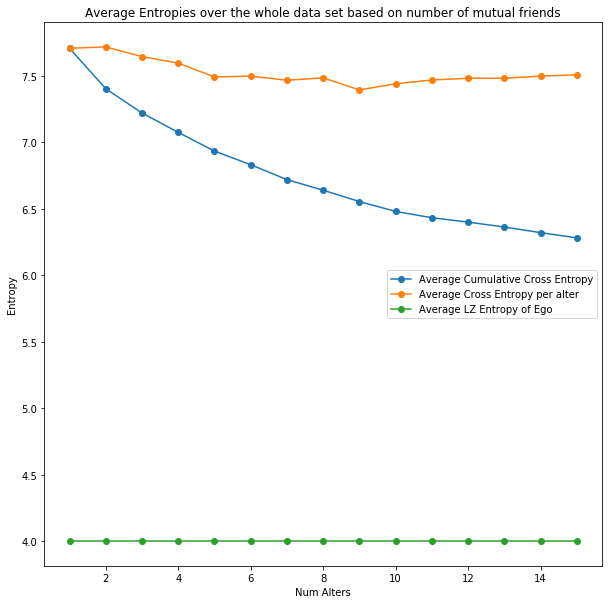

In [129]:
'''Cumulative Cross Entropy of a given Ego'''
fig=plt.figure(figsize=(10, 10))
#plt.plot(np.arange(1,16,1),MutLocs_Avg_0 , '-o', label = 'Proportions of Mutual Locations')
plt.plot(np.arange(1,16,1), CCE_All_Avg, '-o', label = 'Average Cumulative Cross Entropy')
plt.plot(np.arange(1,16,1),LZ_CE_Avg[1:] , '-o', label = 'Average Cross Entropy per alter')
plt.plot(np.arange(1,16,1),[LZ_CE_Avg[0]]*15 , '-o', label = 'Average LZ Entropy of Ego')
#plt.plot(np.arange(1,16,1), CCE_Temp, '-o', label = 'Temporal Control')
#plt.plot(np.arange(1,16,1), LZUsr1, '--', label = 'Entropy of Ego')
plt.title('Average Entropies over the whole data set based on number of mutual friends')
plt.ylabel('Entropy')
plt.xlabel('Num Alters')
plt.legend()
plt.show()

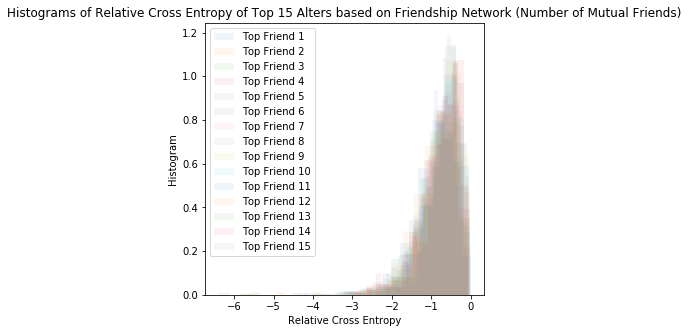

In [127]:
n = 15
fig=plt.figure(figsize=(5, 5))
plt.title('Histograms of Relative Cross Entropy of Top ' + str(n) + ' Alters based on Friendship Network (Number of Mutual Friends)')
plt.xlabel('Relative Cross Entropy')
plt.ylabel('Histogram')
i = 1
for FriendRank in entropyMutFriendRank[:n]:
    plt.hist(FriendRank,bins = 20,density = True, label = 'Top Friend ' + str(i),alpha=1/n)
    i+=1
plt.legend()
plt.show()


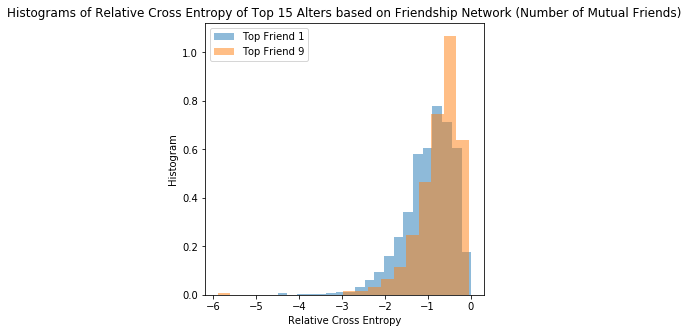

In [137]:
n = 15
fig=plt.figure(figsize=(5, 5))
plt.title('Histograms of Relative Cross Entropy of Top ' + str(n) + ' Alters based on Friendship Network (Number of Mutual Friends)')
plt.xlabel('Relative Cross Entropy')
plt.ylabel('Histogram')
i = 1
plt.hist(entropyMutFriendRank[i-1],bins = 20,density = True, label = 'Top Friend ' + str(i),alpha=1/2)
i = 9
plt.hist(entropyMutFriendRank[i-1],bins = 20,density = True, label = 'Top Friend ' + str(i),alpha=1/2)
plt.legend()
plt.show()


In [130]:
'''Average Cross entropy per Alter for Top Friends based on number of Mutual Friends'''
LZ_CE_Avg

array([4.00091811, 7.70634812, 7.7166232 , 7.64379867, 7.59488143,
       7.49055635, 7.49669386, 7.46596963, 7.48383553, 7.3933183 ,
       7.43898905, 7.46788398, 7.48076225, 7.48105898, 7.49703202,
       7.50649477])

In [133]:
'''Average Cumulative Cross entropy per Alter for Top Friends based on number of Mutual Friends'''
CCE_All_Avg

array([7.70634812, 7.40197591, 7.2196136 , 7.07391155, 6.93301035,
       6.83097629, 6.7186885 , 6.63894545, 6.55385467, 6.47948663,
       6.43216736, 6.39921214, 6.36236657, 6.32013901, 6.28103039])